In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CARGA DEL DATASET

In [18]:
df = pd.read_csv("c:/Users/Benjamin Alocilla/Datasets/Titanic-Dataset.csv", index_col=10)
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Cabin,,,,,,,,,,,
NaN,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
C85,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
NaN,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
C123,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
NaN,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
NaN,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
E46,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
NaN,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
NaN,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S


INFORMACIÓN DEL DATASET

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, nan to nan
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


CONSULTANDO Y ELIMINANDO DUPLICADOS

In [21]:
duplicados = df.duplicated().sum()
if duplicados > 0:
    print(f"Se encontraron {duplicados} filas duplicadas. Procediendo a eliminarlas")
    df.drop_duplicates(inplace=True)
else:
    print("No se encotraron filas duplicadas. No es necesario eliminarlas")

print("Dimensiones tras el paso de duplicados:", df.shape)

No se encotraron filas duplicadas. No es necesario eliminarlas
Dimensiones tras el paso de duplicados: (891, 11)


IDENTIFICANDO Y ELIMINANDO NULOS

In [22]:
nulos_columnas = df.isnull().sum()
nulos_filas = df[df.isnull().any(axis=1)]
total_nulos = nulos_columnas.sum()

In [25]:
nulos_columnas

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [23]:
nulos_filas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Cabin,,,,,,,,,,,
NaN,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
NaN,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
NaN,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
NaN,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
NaN,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
NaN,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
NaN,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
NaN,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S


GRÁFICO DE SUPERVIVIENTES VS FALLECIDOS

In [26]:
# Imputación y Eliminación
if nulos_columnas["Age"] > 0:
    df["Age"] = df["Age"].fillna(df["Age"].median())
    print("Reeplazo de nulos por la mediana!")
else:
    print("No hay valores nulos que limpiar")

if nulos_columnas["Embarked"] > 0:
    df.dropna(subset=["Embarked"], inplace=True)
    print("Limpieza de nulos completada!")
else:
    print("No hay valores nulos que limpiar")

if nulos_columnas["Survived"] > 0:
    df.dropna(subset=["Survived"], inplace=True)
    print("Limpieza de nulos completada!")
else:
    print("No hay valores nulos que limpiar")

Reeplazo de nulos por la mediana!
Limpieza de nulos completada!
No hay valores nulos que limpiar


In [50]:
Supervivientes = pd.read_csv("c:/Users/Benjamin Alocilla/Datasets/Titanic-Dataset.csv")
Supervivientes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
Supervivientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
Supervivientes.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
Muertos = pd.read_csv("c:/Users/Benjamin Alocilla/Datasets/Titanic-Dataset.csv")
Muertos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [67]:
Survived = Supervivientes.duplicated().sum()
if Survived > 0:
    print(f"Se encontraron {Survived} filas duplicadas. Procediendo a eliminarlas")
    Supervivientes.drop_duplicates(inplace=True)
else:
    print("No se encotraron filas duplicadas. No es necesario eliminarlas")

print("Dimensiones tras el paso de duplicados:", Supervivientes.shape)

No se encotraron filas duplicadas. No es necesario eliminarlas
Dimensiones tras el paso de duplicados: (891, 12)


In [74]:
nulos_columnas_s = Supervivientes.isnull().sum()
nulos_filas_s = Supervivientes[Supervivientes.isnull().any(axis=1)]
total_nulos_s = nulos_columnas_s.sum()

In [76]:
nulos_columnas_s

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
nulos_filas_s

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [82]:
# Imputación y Eliminación
if nulos_columnas_s["Survived"] > 0:
    Supervivientes["Survived"] = Supervivientes["Survived"].fillna(Supervivientes["Survived"])
    print("Reeplazo de nulos por la mediana!")
else:
    print("No hay valores nulos que limpiar")

if nulos_columnas_s["Survived"] > 0:
    Supervivientes.dropna(subset=["Survived"])
    print("Limpieza de nulos completada!")
else:
    print("No hay valores nulos que limpiar")

if nulos_columnas_s["Survived"] > 0:
    Supervivientes.dropna(subset=["Survived"])
    print("Limpieza de nulos completada!")
else:
    print("No hay valores nulos que limpiar")


No hay valores nulos que limpiar
No hay valores nulos que limpiar
No hay valores nulos que limpiar


GRÁFICOS

ConversionError: Failed to convert value(s) to axis units: array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
       'Emir, Mr. Farred Chehab', 'Fortune, Mr. Charles Alexander',
       'O\'Dwyer, Miss. Ellen "Nellie"', 'Todoroff, Mr. Lalio',
       'Uruchurtu, Don. Manuel E',
       'Spencer, Mrs. William Augustus (Marie Eugenie)',
       'Glynn, Miss. Mary Agatha', 'Wheadon, Mr. Edward H',
       'Meyer, Mr. Edgar Joseph', 'Holverson, Mr. Alexander Oskar',
       'Mamee, Mr. Hanna', 'Cann, Mr. Ernest Charles',
       'Vander Planke, Miss. Augusta Maria',
       'Nicola-Yarred, Miss. Jamila',
       'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
       'Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)',
       'Kraeff, Mr. Theodor', 'Laroche, Miss. Simonne Marie Anne Andree',
       'Devaney, Miss. Margaret Delia', 'Rogers, Mr. William John',
       'Lennon, Mr. Denis', "O'Driscoll, Miss. Bridget",
       'Samaan, Mr. Youssef',
       'Arnold-Franchi, Mrs. Josef (Josefine Franchi)',
       'Panula, Master. Juha Niilo', 'Nosworthy, Mr. Richard Cater',
       'Harper, Mrs. Henry Sleeper (Myna Haxtun)',
       'Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)',
       'Ostby, Mr. Engelhart Cornelius', 'Woolner, Mr. Hugh',
       'Rugg, Miss. Emily', 'Novel, Mr. Mansouer',
       'West, Miss. Constance Mirium',
       'Goodwin, Master. William Frederick', 'Sirayanian, Mr. Orsen',
       'Icard, Miss. Amelie', 'Harris, Mr. Henry Birkhardt',
       'Skoog, Master. Harald', 'Stewart, Mr. Albert A',
       'Moubarek, Master. Gerios', 'Nye, Mrs. (Elizabeth Ramell)',
       'Crease, Mr. Ernest James', 'Andersson, Miss. Erna Alexandra',
       'Kink, Mr. Vincenz', 'Jenkin, Mr. Stephen Curnow',
       'Goodwin, Miss. Lillian Amy', 'Hood, Mr. Ambrose Jr',
       'Chronopoulos, Mr. Apostolos', 'Bing, Mr. Lee',
       'Moen, Mr. Sigurd Hansen', 'Staneff, Mr. Ivan',
       'Moutal, Mr. Rahamin Haim', 'Caldwell, Master. Alden Gates',
       'Dowdell, Miss. Elizabeth', 'Waelens, Mr. Achille',
       'Sheerlinck, Mr. Jan Baptist', 'McDermott, Miss. Brigdet Delia',
       'Carrau, Mr. Francisco M', 'Ilett, Miss. Bertha',
       'Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson)',
       'Ford, Mr. William Neal', 'Slocovski, Mr. Selman Francis',
       'Fortune, Miss. Mabel Helen', 'Celotti, Mr. Francesco',
       'Christmann, Mr. Emil', 'Andreasson, Mr. Paul Edvin',
       'Chaffee, Mr. Herbert Fuller', 'Dean, Mr. Bertram Frank',
       'Coxon, Mr. Daniel', 'Shorney, Mr. Charles Joseph',
       'Goldschmidt, Mr. George B', 'Greenfield, Mr. William Bertram',
       'Doling, Mrs. John T (Ada Julia Bone)', 'Kantor, Mr. Sinai',
       'Petranec, Miss. Matilda', 'Petroff, Mr. Pastcho ("Pentcho")',
       'White, Mr. Richard Frasar', 'Johansson, Mr. Gustaf Joel',
       'Gustafsson, Mr. Anders Vilhelm', 'Mionoff, Mr. Stoytcho',
       'Salkjelsvik, Miss. Anna Kristine', 'Moss, Mr. Albert Johan',
       'Rekic, Mr. Tido', 'Moran, Miss. Bertha',
       'Porter, Mr. Walter Chamberlain', 'Zabour, Miss. Hileni',
       'Barton, Mr. David John', 'Jussila, Miss. Katriina',
       'Attalah, Miss. Malake', 'Pekoniemi, Mr. Edvard',
       'Connors, Mr. Patrick', 'Turpin, Mr. William John Robert',
       'Baxter, Mr. Quigg Edmond', 'Andersson, Miss. Ellis Anna Maria',
       'Hickman, Mr. Stanley George', 'Moore, Mr. Leonard Charles',
       'Nasser, Mr. Nicholas', 'Webber, Miss. Susan',
       'White, Mr. Percival Wayland', 'Nicola-Yarred, Master. Elias',
       'McMahon, Mr. Martin', 'Madsen, Mr. Fridtjof Arne',
       'Peter, Miss. Anna', 'Ekstrom, Mr. Johan', 'Drazenoic, Mr. Jozef',
       'Coelho, Mr. Domingos Fernandeo',
       'Robins, Mrs. Alexander A (Grace Charity Laury)',
       'Weisz, Mrs. Leopold (Mathilde Francoise Pede)',
       'Sobey, Mr. Samuel James Hayden', 'Richard, Mr. Emile',
       'Newsom, Miss. Helen Monypeny', 'Futrelle, Mr. Jacques Heath',
       'Osen, Mr. Olaf Elon', 'Giglio, Mr. Victor',
       'Boulos, Mrs. Joseph (Sultana)', 'Nysten, Miss. Anna Sofia',
       'Hakkarainen, Mrs. Pekka Pietari (Elin Matilda Dolck)',
       'Burke, Mr. Jeremiah', 'Andrew, Mr. Edgardo Samuel',
       'Nicholls, Mr. Joseph Charles',
       'Andersson, Mr. August Edvard ("Wennerstrom")',
       'Ford, Miss. Robina Maggie "Ruby"',
       'Navratil, Mr. Michel ("Louis M Hoffman")',
       'Byles, Rev. Thomas Roussel Davids', 'Bateman, Rev. Robert James',
       'Pears, Mrs. Thomas (Edith Wearne)', 'Meo, Mr. Alfonzo',
       'van Billiard, Mr. Austin Blyler', 'Olsen, Mr. Ole Martin',
       'Williams, Mr. Charles Duane', 'Gilnagh, Miss. Katherine "Katie"',
       'Corn, Mr. Harry', 'Smiljanic, Mr. Mile',
       'Sage, Master. Thomas Henry', 'Cribb, Mr. John Hatfield',
       'Watt, Mrs. James (Elizabeth "Bessie" Inglis Milne)',
       'Bengtsson, Mr. John Viktor', 'Calic, Mr. Jovo',
       'Panula, Master. Eino Viljami',
       'Goldsmith, Master. Frank John William "Frankie"',
       'Chibnall, Mrs. (Edith Martha Bowerman)',
       'Skoog, Mrs. William (Anna Bernhardina Karlsson)',
       'Baumann, Mr. John D', 'Ling, Mr. Lee',
       'Van der hoef, Mr. Wyckoff', 'Rice, Master. Arthur',
       'Johnson, Miss. Eleanor Ileen', 'Sivola, Mr. Antti Wilhelm',
       'Smith, Mr. James Clinch', 'Klasen, Mr. Klas Albin',
       'Lefebre, Master. Henry Forbes', 'Isham, Miss. Ann Elizabeth',
       'Hale, Mr. Reginald', 'Leonard, Mr. Lionel',
       'Sage, Miss. Constance Gladys', 'Pernot, Mr. Rene',
       'Asplund, Master. Clarence Gustaf Hugo',
       'Becker, Master. Richard F', 'Kink-Heilmann, Miss. Luise Gretchen',
       'Rood, Mr. Hugh Roscoe',
       'O\'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)',
       'Romaine, Mr. Charles Hallace ("Mr C Rolmane")',
       'Bourke, Mr. John', 'Turcin, Mr. Stjepan', 'Pinsky, Mrs. (Rosa)',
       'Carbines, Mr. William',
       'Andersen-Jensen, Miss. Carla Christine Nielsine',
       'Navratil, Master. Michel M',
       'Brown, Mrs. James Joseph (Margaret Tobin)',
       'Lurette, Miss. Elise', 'Mernagh, Mr. Robert',
       'Olsen, Mr. Karl Siegwart Andreas',
       'Madigan, Miss. Margaret "Maggie"',
       'Yrois, Miss. Henriette ("Mrs Harbeck")',
       'Vande Walle, Mr. Nestor Cyriel', 'Sage, Mr. Frederick',
       'Johanson, Mr. Jakob Alfred', 'Youseff, Mr. Gerious',
       'Cohen, Mr. Gurshon "Gus"', 'Strom, Miss. Telma Matilda',
       'Backstrom, Mr. Karl Alfred', 'Albimona, Mr. Nassef Cassem',
       'Carr, Miss. Helen "Ellen"', 'Blank, Mr. Henry', 'Ali, Mr. Ahmed',
       'Cameron, Miss. Clear Annie', 'Perkin, Mr. John Henry',
       'Givard, Mr. Hans Kristensen', 'Kiernan, Mr. Philip',
       'Newell, Miss. Madeleine', 'Honkanen, Miss. Eliina',
       'Jacobsohn, Mr. Sidney Samuel', 'Bazzani, Miss. Albina',
       'Harris, Mr. Walter', 'Sunderland, Mr. Victor Francis',
       'Bracken, Mr. James H', 'Green, Mr. George Henry',
       'Nenkoff, Mr. Christo', 'Hoyt, Mr. Frederick Maxfield',
       'Berglund, Mr. Karl Ivar Sven', 'Mellors, Mr. William John',
       'Lovell, Mr. John Hall ("Henry")', 'Fahlstrom, Mr. Arne Jonas',
       'Lefebre, Miss. Mathilde',
       'Harris, Mrs. Henry Birkhardt (Irene Wallach)',
       'Larsson, Mr. Bengt Edvin', 'Sjostedt, Mr. Ernst Adolf',
       'Asplund, Miss. Lillian Gertrud',
       'Leyson, Mr. Robert William Norman',
       'Harknett, Miss. Alice Phoebe', 'Hold, Mr. Stephen',
       'Collyer, Miss. Marjorie "Lottie"',
       'Pengelly, Mr. Frederick William', 'Hunt, Mr. George Henry',
       'Zabour, Miss. Thamine', 'Murphy, Miss. Katherine "Kate"',
       'Coleridge, Mr. Reginald Charles', 'Maenpaa, Mr. Matti Alexanteri',
       'Attalah, Mr. Sleiman', 'Minahan, Dr. William Edward',
       'Lindahl, Miss. Agda Thorilda Viktoria',
       'Hamalainen, Mrs. William (Anna)', 'Beckwith, Mr. Richard Leonard',
       'Carter, Rev. Ernest Courtenay', 'Reed, Mr. James George',
       'Strom, Mrs. Wilhelm (Elna Matilda Persson)',
       'Stead, Mr. William Thomas', 'Lobb, Mr. William Arthur',
       'Rosblom, Mrs. Viktor (Helena Wilhelmina)',
       'Touma, Mrs. Darwis (Hanne Youssef Razi)',
       'Thorne, Mrs. Gertrude Maybelle', 'Cherry, Miss. Gladys',
       'Ward, Miss. Anna', 'Parrish, Mrs. (Lutie Davis)',
       'Smith, Mr. Thomas', 'Asplund, Master. Edvin Rojj Felix',
       'Taussig, Mr. Emil', 'Harrison, Mr. William', 'Henry, Miss. Delia',
       'Reeves, Mr. David', 'Panula, Mr. Ernesti Arvid',
       'Persson, Mr. Ernst Ulrik',
       'Graham, Mrs. William Thompson (Edith Junkins)',
       'Bissette, Miss. Amelia', 'Cairns, Mr. Alexander',
       'Tornquist, Mr. William Henry',
       'Mellinger, Mrs. (Elizabeth Anne Maidment)',
       'Natsch, Mr. Charles H', 'Healy, Miss. Hanora "Nora"',
       'Andrews, Miss. Kornelia Theodosia',
       'Lindblom, Miss. Augusta Charlotta', 'Parkes, Mr. Francis "Frank"',
       'Rice, Master. Eric', 'Abbott, Mrs. Stanton (Rosa Hunt)',
       'Duane, Mr. Frank', 'Olsson, Mr. Nils Johan Goransson',
       'de Pelsmaeker, Mr. Alfons', 'Dorking, Mr. Edward Arthur',
       'Smith, Mr. Richard William', 'Stankovic, Mr. Ivan',
       'de Mulder, Mr. Theodore', 'Naidenoff, Mr. Penko',
       'Hosono, Mr. Masabumi', 'Connolly, Miss. Kate',
       'Barber, Miss. Ellen "Nellie"',
       'Bishop, Mrs. Dickinson H (Helen Walton)',
       'Levy, Mr. Rene Jacques', 'Haas, Miss. Aloisia',
       'Mineff, Mr. Ivan', 'Lewy, Mr. Ervin G', 'Hanna, Mr. Mansour',
       'Allison, Miss. Helen Loraine', 'Saalfeld, Mr. Adolphe',
       'Baxter, Mrs. James (Helene DeLaudeniere Chaput)',
       'Kelly, Miss. Anna Katherine "Annie Kate"', 'McCoy, Mr. Bernard',
       'Johnson, Mr. William Cahoone Jr', 'Keane, Miss. Nora A',
       'Williams, Mr. Howard Hugh "Harry"',
       'Allison, Master. Hudson Trevor', 'Fleming, Miss. Margaret',
       'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)',
       'Abelson, Mr. Samuel', 'Francatelli, Miss. Laura Mabel',
       'Hays, Miss. Margaret Bechstein', 'Ryerson, Miss. Emily Borie',
       'Lahtinen, Mrs. William (Anna Sylfven)', 'Hendekovic, Mr. Ignjac',
       'Hart, Mr. Benjamin', 'Nilsson, Miss. Helmina Josefina',
       'Kantor, Mrs. Sinai (Miriam Sternin)', 'Moraweck, Dr. Ernest',
       'Wick, Miss. Mary Natalie',
       'Spedden, Mrs. Frederic Oakley (Margaretta Corning Stone)',
       'Dennis, Mr. Samuel', 'Danoff, Mr. Yoto',
       'Slayter, Miss. Hilda Mary',
       'Caldwell, Mrs. Albert Francis (Sylvia Mae Harbaugh)',
       'Sage, Mr. George John Jr', 'Young, Miss. Marie Grice',
       'Nysveen, Mr. Johan Hansen', 'Ball, Mrs. (Ada E Hall)',
       'Goldsmith, Mrs. Frank John (Emily Alice Brown)',
       'Hippach, Miss. Jean Gertrude', 'McCoy, Miss. Agnes',
       'Partner, Mr. Austen', 'Graham, Mr. George Edward',
       'Vander Planke, Mr. Leo Edmondus',
       'Frauenthal, Mrs. Henry William (Clara Heinsheimer)',
       'Denkoff, Mr. Mitto', 'Pears, Mr. Thomas Clinton',
       'Burns, Miss. Elizabeth Margaret', 'Dahl, Mr. Karl Edwart',
       'Blackwell, Mr. Stephen Weart', 'Navratil, Master. Edmond Roger',
       'Fortune, Miss. Alice Elizabeth', 'Collander, Mr. Erik Gustaf',
       'Sedgwick, Mr. Charles Frederick Waddington',
       'Fox, Mr. Stanley Hubert', 'Brown, Miss. Amelia "Mildred"',
       'Smith, Miss. Marion Elsie',
       'Davison, Mrs. Thomas Henry (Mary E Finck)',
       'Coutts, Master. William Loch "William"', 'Dimic, Mr. Jovan',
       'Odahl, Mr. Nils Martin', 'Williams-Lambert, Mr. Fletcher Fellows',
       'Elias, Mr. Tannous', 'Arnold-Franchi, Mr. Josef',
       'Yousif, Mr. Wazli', 'Vanden Steen, Mr. Leo Peter',
       'Bowerman, Miss. Elsie Edith', 'Funk, Miss. Annie Clemmer',
       'McGovern, Miss. Mary', 'Mockler, Miss. Helen Mary "Ellie"',
       'Skoog, Mr. Wilhelm', 'del Carlo, Mr. Sebastiano',
       'Barbara, Mrs. (Catherine David)', 'Asim, Mr. Adola',
       "O'Brien, Mr. Thomas", 'Adahl, Mr. Mauritz Nils Martin',
       'Warren, Mrs. Frank Manley (Anna Sophia Atkinson)',
       'Moussa, Mrs. (Mantoura Boulos)', 'Jermyn, Miss. Annie',
       'Aubart, Mme. Leontine Pauline', 'Harder, Mr. George Achilles',
       'Wiklund, Mr. Jakob Alfred', 'Beavan, Mr. William Thomas',
       'Ringhini, Mr. Sante', 'Palsson, Miss. Stina Viola',
       'Meyer, Mrs. Edgar Joseph (Leila Saks)',
       'Landergren, Miss. Aurora Adelia', 'Widener, Mr. Harry Elkins',
       'Betros, Mr. Tannous', 'Gustafsson, Mr. Karl Gideon',
       'Bidois, Miss. Rosalie', 'Nakid, Miss. Maria ("Mary")',
       'Tikkanen, Mr. Juho',
       'Holverson, Mrs. Alexander Oskar (Mary Aline Towner)',
       'Plotcharsky, Mr. Vasil', 'Davies, Mr. Charles Henry',
       'Goodwin, Master. Sidney Leonard', 'Buss, Miss. Kate',
       'Sadlier, Mr. Matthew', 'Lehmann, Miss. Bertha',
       'Carter, Mr. William Ernest', 'Jansson, Mr. Carl Olof',
       'Gustafsson, Mr. Johan Birger', 'Newell, Miss. Marjorie',
       'Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengtsson)',
       'Johansson, Mr. Erik', 'Olsson, Miss. Elina',
       'McKane, Mr. Peter David', 'Pain, Dr. Alfred',
       'Trout, Mrs. William H (Jessie L)', 'Niskanen, Mr. Juha',
       'Adams, Mr. John', 'Jussila, Miss. Mari Aina',
       'Hakkarainen, Mr. Pekka Pietari', 'Oreskovic, Miss. Marija',
       'Gale, Mr. Shadrach', 'Widegren, Mr. Carl/Charles Peter',
       'Richards, Master. William Rowe',
       'Birkeland, Mr. Hans Martin Monsen', 'Lefebre, Miss. Ida',
       'Sdycoff, Mr. Todor', 'Hart, Mr. Henry', 'Minahan, Miss. Daisy E',
       'Cunningham, Mr. Alfred Fleming', 'Sundman, Mr. Johan Julian',
       'Meek, Mrs. Thomas (Annie Louise Rowley)',
       'Drew, Mrs. James Vivian (Lulu Thorne Christian)',
       'Silven, Miss. Lyyli Karoliina', 'Matthews, Mr. William John',
       'Van Impe, Miss. Catharina', 'Gheorgheff, Mr. Stanio',
       'Charters, Mr. David', 'Zimmerman, Mr. Leo',
       'Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria Brogren)',
       'Rosblom, Mr. Viktor Richard', 'Wiseman, Mr. Phillippe',
       'Clarke, Mrs. Charles V (Ada Maria Winfield)',
       'Phillips, Miss. Kate Florence ("Mrs Kate Louise Phillips Marshall")',
       'Flynn, Mr. James', 'Pickard, Mr. Berk (Berk Trembisky)',
       'Bjornstrom-Steffansson, Mr. Mauritz Hakan',
       'Thorneycroft, Mrs. Percival (Florence Kate White)',
       'Louch, Mrs. Charles Alexander (Alice Adelaide Slow)',
       'Kallio, Mr. Nikolai Erland', 'Silvey, Mr. William Baird',
       'Carter, Miss. Lucile Polk',
       'Ford, Miss. Doolina Margaret "Daisy"',
       'Richards, Mrs. Sidney (Emily Hocking)', 'Fortune, Mr. Mark',
       'Kvillner, Mr. Johan Henrik Johannesson',
       'Hart, Mrs. Benjamin (Esther Ada Bloomfield)', 'Hampe, Mr. Leon',
       'Petterson, Mr. Johan Emil', 'Reynaldo, Ms. Encarnacion',
       'Johannesen-Bratthammer, Mr. Bernt', 'Dodge, Master. Washington',
       'Mellinger, Miss. Madeleine Violet', 'Seward, Mr. Frederic Kimber',
       'Baclini, Miss. Marie Catherine', 'Peuchen, Major. Arthur Godfrey',
       'West, Mr. Edwy Arthur', 'Hagland, Mr. Ingvald Olai Olsen',
       'Foreman, Mr. Benjamin Laventall', 'Goldenberg, Mr. Samuel L',
       'Peduzzi, Mr. Joseph', 'Jalsevac, Mr. Ivan',
       'Millet, Mr. Francis Davis', 'Kenyon, Mrs. Frederick R (Marion)',
       'Toomey, Miss. Ellen', "O'Connor, Mr. Maurice",
       'Anderson, Mr. Harry', 'Morley, Mr. William', 'Gee, Mr. Arthur H',
       'Milling, Mr. Jacob Christian', 'Maisner, Mr. Simon',
       'Goncalves, Mr. Manuel Estanslas', 'Campbell, Mr. William',
       'Smart, Mr. John Montgomery', 'Scanlan, Mr. James',
       'Baclini, Miss. Helene Barbara', 'Keefe, Mr. Arthur',
       'Cacic, Mr. Luka', 'West, Mrs. Edwy Arthur (Ada Mary Worth)',
       'Jerwan, Mrs. Amin S (Marie Marthe Thuillard)',
       'Strandberg, Miss. Ida Sofia', 'Clifford, Mr. George Quincy',
       'Renouf, Mr. Peter Henry', 'Braund, Mr. Lewis Richard',
       'Karlsson, Mr. Nils August', 'Hirvonen, Miss. Hildur E',
       'Goodwin, Master. Harold Victor',
       'Frost, Mr. Anthony Wood "Archie"', 'Rouse, Mr. Richard Henry',
       'Turkula, Mrs. (Hedwig)', 'Bishop, Mr. Dickinson H',
       'Lefebre, Miss. Jeannie',
       'Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)',
       'Kent, Mr. Edward Austin', 'Somerton, Mr. Francis William',
       'Coutts, Master. Eden Leslie "Neville"',
       'Hagland, Mr. Konrad Mathias Reiersen', 'Windelov, Mr. Einar',
       'Molson, Mr. Harry Markland', 'Artagaveytia, Mr. Ramon',
       'Stanley, Mr. Edward Roland', 'Yousseff, Mr. Gerious',
       'Eustis, Miss. Elizabeth Mussey',
       'Shellard, Mr. Frederick William',
       'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
       'Svensson, Mr. Olof', 'Calic, Mr. Petar', 'Canavan, Miss. Mary',
       "O'Sullivan, Miss. Bridget Mary", 'Laitinen, Miss. Kristina Sofia',
       'Maioni, Miss. Roberta',
       'Penasco y Castellana, Mr. Victor de Satode',
       'Quick, Mrs. Frederick Charles (Jane Richards)',
       'Bradley, Mr. George ("George Arthur Brayton")',
       'Olsen, Mr. Henry Margido', 'Lang, Mr. Fang',
       'Daly, Mr. Eugene Patrick', 'Webber, Mr. James',
       'McGough, Mr. James Robert',
       'Rothschild, Mrs. Martin (Elizabeth L. Barrett)',
       'Coleff, Mr. Satio', 'Walker, Mr. William Anderson',
       'Lemore, Mrs. (Amelia Milley)', 'Ryan, Mr. Patrick',
       'Angle, Mrs. William A (Florence "Mary" Agnes Hughes)',
       'Pavlovic, Mr. Stefo', 'Perreault, Miss. Anne', 'Vovk, Mr. Janko',
       'Lahoud, Mr. Sarkis',
       'Hippach, Mrs. Louis Albert (Ida Sophia Fischer)',
       'Kassem, Mr. Fared', 'Farrell, Mr. James', 'Ridsdale, Miss. Lucy',
       'Farthing, Mr. John', 'Salonen, Mr. Johan Werner',
       'Hocking, Mr. Richard George', 'Quick, Miss. Phyllis May',
       'Toufik, Mr. Nakli', 'Elias, Mr. Joseph Jr',
       'Peter, Mrs. Catherine (Catherine Rizk)', 'Cacic, Miss. Marija',
       'Hart, Miss. Eva Miriam', 'Butt, Major. Archibald Willingham',
       'LeRoy, Miss. Bertha', 'Risien, Mr. Samuel Beard',
       'Frolicher, Miss. Hedwig Margaritha', 'Crosby, Miss. Harriet R',
       'Andersson, Miss. Ingeborg Constanzia',
       'Andersson, Miss. Sigrid Elisabeth', 'Beane, Mr. Edward',
       'Douglas, Mr. Walter Donald', 'Nicholson, Mr. Arthur Ernest',
       'Beane, Mrs. Edward (Ethel Clarke)', 'Padro y Manent, Mr. Julian',
       'Goldsmith, Mr. Frank John', 'Davies, Master. John Morgan Jr',
       'Thayer, Mr. John Borland Jr', 'Sharp, Mr. Percival James R',
       "O'Brien, Mr. Timothy", 'Leeni, Mr. Fahim ("Philip Zenni")',
       'Ohman, Miss. Velin', 'Wright, Mr. George',
       'Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")',
       'Robbins, Mr. Victor', 'Taussig, Mrs. Emil (Tillie Mandelbaum)',
       'de Messemaeker, Mrs. Guillaume Joseph (Emma)',
       'Morrow, Mr. Thomas Rowan', 'Sivic, Mr. Husein',
       'Norman, Mr. Robert Douglas', 'Simmons, Mr. John',
       'Meanwell, Miss. (Marion Ogden)', 'Davies, Mr. Alfred J',
       'Stoytcheff, Mr. Ilia',
       'Palsson, Mrs. Nils (Alma Cornelia Berglund)',
       'Doharr, Mr. Tannous', 'Jonsson, Mr. Carl', 'Harris, Mr. George',
       'Appleton, Mrs. Edward Dale (Charlotte Lamson)',
       'Flynn, Mr. John Irwin ("Irving")', 'Kelly, Miss. Mary',
       'Rush, Mr. Alfred George John', 'Patchett, Mr. George',
       'Garside, Miss. Ethel',
       'Silvey, Mrs. William Baird (Alice Munger)',
       'Caram, Mrs. Joseph (Maria Elias)', 'Jussila, Mr. Eiriik',
       'Christy, Miss. Julie Rachel',
       'Thayer, Mrs. John Borland (Marian Longstreth Morris)',
       'Downton, Mr. William James', 'Ross, Mr. John Hugo',
       'Paulner, Mr. Uscher', 'Taussig, Miss. Ruth',
       'Jarvis, Mr. John Denzil', 'Frolicher-Stehli, Mr. Maxmillian',
       'Gilinski, Mr. Eliezer', 'Murdlin, Mr. Joseph',
       'Rintamaki, Mr. Matti',
       'Stephenson, Mrs. Walter Bertram (Martha Eustis)',
       'Elsbury, Mr. William James', 'Bourke, Miss. Mary',
       'Chapman, Mr. John Henry', 'Van Impe, Mr. Jean Baptiste',
       'Leitch, Miss. Jessie Wills', 'Johnson, Mr. Alfred',
       'Boulos, Mr. Hanna',
       'Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")',
       'Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)',
       'Slabenoff, Mr. Petco', 'Harrington, Mr. Charles H',
       'Torber, Mr. Ernst William', 'Homer, Mr. Harry ("Mr E Haven")',
       'Lindell, Mr. Edvard Bengtsson', 'Karaic, Mr. Milan',
       'Daniel, Mr. Robert Williams',
       'Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)',
       'Shutes, Miss. Elizabeth W',
       'Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)',
       'Jardin, Mr. Jose Neto', 'Murphy, Miss. Margaret Jane',
       'Horgan, Mr. John', 'Brocklebank, Mr. William Alfred',
       'Herman, Miss. Alice', 'Danbom, Mr. Ernst Gilbert',
       'Lobb, Mrs. William Arthur (Cordelia K Stanlick)',
       'Becker, Miss. Marion Louise', 'Gavey, Mr. Lawrence',
       'Yasbeck, Mr. Antoni', 'Kimball, Mr. Edwin Nelson Jr',
       'Nakid, Mr. Sahid', 'Hansen, Mr. Henry Damsgaard',
       'Bowen, Mr. David John "Dai"', 'Sutton, Mr. Frederick',
       'Kirkland, Rev. Charles Leonard', 'Longley, Miss. Gretchen Fiske',
       'Bostandyeff, Mr. Guentcho', "O'Connell, Mr. Patrick D",
       'Barkworth, Mr. Algernon Henry Wilson',
       'Lundahl, Mr. Johan Svensson', 'Stahelin-Maeglin, Dr. Max',
       'Parr, Mr. William Henry Marsh', 'Skoog, Miss. Mabel',
       'Davis, Miss. Mary', 'Leinonen, Mr. Antti Gustaf',
       'Collyer, Mr. Harvey', 'Panula, Mrs. Juha (Maria Emilia Ojala)',
       'Thorneycroft, Mr. Percival', 'Jensen, Mr. Hans Peder',
       'Sagesser, Mlle. Emma', 'Skoog, Miss. Margit Elizabeth',
       'Foo, Mr. Choong', 'Baclini, Miss. Eugenie',
       'Harper, Mr. Henry Sleeper', 'Cor, Mr. Liudevit',
       'Simonius-Blumer, Col. Oberst Alfons', 'Willey, Mr. Edward',
       'Stanley, Miss. Amy Zillah Elsie', 'Mitkoff, Mr. Mito',
       'Doling, Miss. Elsie', 'Kalvik, Mr. Johannes Halvorsen',
       'O\'Leary, Miss. Hanora "Norah"', 'Hegarty, Miss. Hanora "Nora"',
       'Hickman, Mr. Leonard Mark', 'Radeff, Mr. Alexander',
       'Bourke, Mrs. John (Catherine)', 'Eitemiller, Mr. George Floyd',
       'Newell, Mr. Arthur Webster', 'Frauenthal, Dr. Henry William',
       'Badt, Mr. Mohamed', 'Colley, Mr. Edward Pomeroy',
       'Coleff, Mr. Peju', 'Lindqvist, Mr. Eino William',
       'Hickman, Mr. Lewis', 'Butler, Mr. Reginald Fenton',
       'Rommetvedt, Mr. Knud Paust', 'Cook, Mr. Jacob',
       'Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)',
       'Brown, Mrs. Thomas William Solomon (Elizabeth Catherine Ford)',
       'Davidson, Mr. Thornton', 'Mitchell, Mr. Henry Michael',
       'Wilhelms, Mr. Charles', 'Watson, Mr. Ennis Hastings',
       'Edvardsson, Mr. Gustaf Hjalmar', 'Sawyer, Mr. Frederick Charles',
       'Turja, Miss. Anna Sofia',
       'Goodwin, Mrs. Frederick (Augusta Tyler)',
       'Cardeza, Mr. Thomas Drake Martinez', 'Peters, Miss. Katie',
       'Hassab, Mr. Hammad', 'Olsvigen, Mr. Thor Anderson',
       'Goodwin, Mr. Charles Edward', 'Brown, Mr. Thomas William Solomon',
       'Laroche, Mr. Joseph Philippe Lemercier',
       'Panula, Mr. Jaako Arnold', 'Dakic, Mr. Branko',
       'Fischer, Mr. Eberhard Thelander',
       'Madill, Miss. Georgette Alexandra', 'Dick, Mr. Albert Adrian',
       'Karun, Miss. Manca', 'Lam, Mr. Ali', 'Saad, Mr. Khalil',
       'Weir, Col. John', 'Chapman, Mr. Charles Henry',
       'Kelly, Mr. James', 'Mullens, Miss. Katherine "Katie"',
       'Thayer, Mr. John Borland',
       'Humblen, Mr. Adolf Mathias Nicolai Olsen',
       'Astor, Mrs. John Jacob (Madeleine Talmadge Force)',
       'Silverthorne, Mr. Spencer Victor', 'Barbara, Miss. Saiide',
       'Gallagher, Mr. Martin', 'Hansen, Mr. Henrik Juul',
       'Morley, Mr. Henry Samuel ("Mr Henry Marshall")',
       'Kelly, Mrs. Florence "Fannie"',
       'Calderhead, Mr. Edward Pennington', 'Cleaver, Miss. Alice',
       'Moubarek, Master. Halim Gonios ("William George")',
       'Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")',
       'Klaber, Mr. Herman', 'Taylor, Mr. Elmer Zebley',
       'Larsson, Mr. August Viktor', 'Greenberg, Mr. Samuel',
       'Soholt, Mr. Peter Andreas Lauritz Andersen',
       'Endres, Miss. Caroline Louise',
       'Troutt, Miss. Edwina Celia "Winnie"', 'McEvoy, Mr. Michael',
       'Johnson, Mr. Malkolm Joackim',
       'Harper, Miss. Annie Jessie "Nina"', 'Jensen, Mr. Svend Lauritz',
       'Gillespie, Mr. William Henry', 'Hodges, Mr. Henry Price',
       'Chambers, Mr. Norman Campbell', 'Oreskovic, Mr. Luka',
       'Renouf, Mrs. Peter Henry (Lillian Jefferys)',
       'Mannion, Miss. Margareth', 'Bryhl, Mr. Kurt Arnold Gottfrid',
       'Ilmakangas, Miss. Pieta Sofia', 'Allen, Miss. Elisabeth Walton',
       'Hassan, Mr. Houssein G N', 'Knight, Mr. Robert J',
       'Berriman, Mr. William John', 'Troupiansky, Mr. Moses Aaron',
       'Williams, Mr. Leslie', 'Ford, Mrs. Edward (Margaret Ann Watson)',
       'Lesurer, Mr. Gustave J', 'Ivanoff, Mr. Kanio',
       'Nankoff, Mr. Minko', 'Hawksford, Mr. Walter James',
       'Cavendish, Mr. Tyrell William',
       'Ryerson, Miss. Susan Parker "Suzette"', 'McNamee, Mr. Neal',
       'Stranden, Mr. Juho', 'Crosby, Capt. Edward Gifford',
       'Abbott, Mr. Rossmore Edward', 'Sinkkonen, Miss. Anna',
       'Marvin, Mr. Daniel Warner', 'Connaghton, Mr. Michael',
       'Wells, Miss. Joan', 'Moor, Master. Meier',
       'Vande Velde, Mr. Johannes Joseph', 'Jonkoff, Mr. Lalio',
       'Herman, Mrs. Samuel (Jane Laver)', 'Hamalainen, Master. Viljo',
       'Carlsson, Mr. August Sigfrid', 'Bailey, Mr. Percy Andrew',
       'Theobald, Mr. Thomas Leonard',
       'Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)',
       'Garfirth, Mr. John', 'Nirva, Mr. Iisakki Antino Aijo',
       'Barah, Mr. Hanna Assi',
       'Carter, Mrs. William Ernest (Lucile Polk)',
       'Eklund, Mr. Hans Linus', 'Hogeboom, Mrs. John C (Anna Andrews)',
       'Brewe, Dr. Arthur Jackson', 'Mangan, Miss. Mary',
       'Moran, Mr. Daniel J', 'Gronnestad, Mr. Daniel Danielsen',
       'Lievens, Mr. Rene Aime', 'Jensen, Mr. Niels Peder',
       'Mack, Mrs. (Mary)', 'Elias, Mr. Dibo',
       'Hocking, Mrs. Elizabeth (Eliza Needs)',
       'Myhrman, Mr. Pehr Fabian Oliver Malkolm', 'Tobin, Mr. Roger',
       'Emanuel, Miss. Virginia Ethel', 'Kilgannon, Mr. Thomas J',
       'Robert, Mrs. Edward Scott (Elisabeth Walton McMillan)',
       'Ayoub, Miss. Banoura',
       'Dick, Mrs. Albert Adrian (Vera Gillespie)',
       'Long, Mr. Milton Clyde', 'Johnston, Mr. Andrew G',
       'Ali, Mr. William', 'Harmer, Mr. Abraham (David Lishin)',
       'Sjoblom, Miss. Anna Sofia', 'Rice, Master. George Hugh',
       'Dean, Master. Bertram Vere', 'Guggenheim, Mr. Benjamin',
       'Keane, Mr. Andrew "Andy"', 'Gaskell, Mr. Alfred',
       'Sage, Miss. Stella Anna', 'Hoyt, Mr. William Fisher',
       'Dantcheff, Mr. Ristiu', 'Otter, Mr. Richard',
       'Leader, Dr. Alice (Farnham)', 'Osman, Mrs. Mara',
       'Ibrahim Shawah, Mr. Yousseff',
       'Van Impe, Mrs. Jean Baptiste (Rosalie Paula Govaert)',
       'Ponesell, Mr. Martin',
       'Collyer, Mrs. Harvey (Charlotte Annie Tate)',
       'Carter, Master. William Thornton II',
       'Thomas, Master. Assad Alexander', 'Hedman, Mr. Oskar Arvid',
       'Johansson, Mr. Karl Johan', 'Andrews, Mr. Thomas Jr',
       'Pettersson, Miss. Ellen Natalia', 'Meyer, Mr. August',
       'Chambers, Mrs. Norman Campbell (Bertha Griggs)',
       'Alexander, Mr. William', 'Lester, Mr. James',
       'Slemen, Mr. Richard James', 'Andersson, Miss. Ebba Iris Alfrida',
       'Tomlin, Mr. Ernest Portage', 'Fry, Mr. Richard',
       'Heininen, Miss. Wendla Maria', 'Mallet, Mr. Albert',
       'Holm, Mr. John Fredrik Alexander', 'Skoog, Master. Karl Thorsten',
       'Hays, Mrs. Charles Melville (Clara Jennings Gregg)',
       'Lulic, Mr. Nikola', 'Reuchlin, Jonkheer. John George',
       'Moor, Mrs. (Beila)', 'Panula, Master. Urho Abraham',
       'Flynn, Mr. John', 'Lam, Mr. Len', 'Mallet, Master. Andre',
       'McCormack, Mr. Thomas Joseph',
       'Stone, Mrs. George Nelson (Martha Evelyn)',
       'Yasbeck, Mrs. Antoni (Selini Alexander)',
       'Richards, Master. George Sibley', 'Saad, Mr. Amin',
       'Augustsson, Mr. Albert', 'Allum, Mr. Owen George',
       'Compton, Miss. Sara Rebecca', 'Pasic, Mr. Jakob',
       'Sirota, Mr. Maurice', 'Chip, Mr. Chang', 'Marechal, Mr. Pierre',
       'Alhomaki, Mr. Ilmari Rudolf', 'Mudd, Mr. Thomas Charles',
       'Serepeca, Miss. Augusta', 'Lemberopolous, Mr. Peter L',
       'Culumovic, Mr. Jeso', 'Abbing, Mr. Anthony',
       'Sage, Mr. Douglas Bullen', 'Markoff, Mr. Marin',
       'Harper, Rev. John',
       'Goldenberg, Mrs. Samuel L (Edwiga Grabowska)',
       'Andersson, Master. Sigvard Harald Elias', 'Svensson, Mr. Johan',
       'Boulos, Miss. Nourelain', 'Lines, Miss. Mary Conover',
       'Carter, Mrs. Ernest Courtenay (Lilian Hughes)',
       'Aks, Mrs. Sam (Leah Rosen)',
       'Wick, Mrs. George Dennick (Mary Hitchcock)',
       'Daly, Mr. Peter Denis ', 'Baclini, Mrs. Solomon (Latifa Qurban)',
       'Razi, Mr. Raihed', 'Hansen, Mr. Claus Peter',
       'Giles, Mr. Frederick Edward',
       'Swift, Mrs. Frederick Joel (Margaret Welles Barron)',
       'Sage, Miss. Dorothy Edith "Dolly"', 'Gill, Mr. John William',
       'Bystrom, Mrs. (Karolina)', 'Duran y More, Miss. Asuncion',
       'Roebling, Mr. Washington Augustus II',
       'van Melkebeke, Mr. Philemon', 'Johnson, Master. Harold Theodor',
       'Balkic, Mr. Cerin',
       'Beckwith, Mrs. Richard Leonard (Sallie Monypeny)',
       'Carlsson, Mr. Frans Olof', 'Vander Cruyssen, Mr. Victor',
       'Abelson, Mrs. Samuel (Hannah Wizosky)',
       'Najib, Miss. Adele Kiamie "Jane"',
       'Gustafsson, Mr. Alfred Ossian', 'Petroff, Mr. Nedelio',
       'Laleff, Mr. Kristo',
       'Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)',
       'Shelley, Mrs. William (Imanita Parrish Hall)',
       'Markun, Mr. Johann', 'Dahlberg, Miss. Gerda Ulrika',
       'Banfield, Mr. Frederick James', 'Sutehall, Mr. Henry Jr',
       'Rice, Mrs. William (Margaret Norton)', 'Montvila, Rev. Juozas',
       'Graham, Miss. Margaret Edith',
       'Johnston, Miss. Catherine Helen "Carrie"',
       'Behr, Mr. Karl Howell', 'Dooley, Mr. Patrick'], dtype=object)

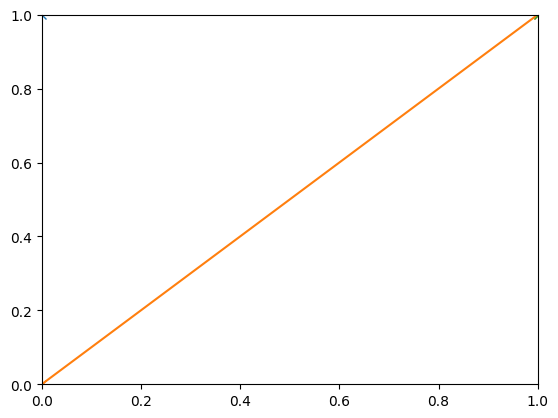

In [52]:
plt.plot(Supervivientes, marker = 'x', label = "Survived")
plt.plot(Muertos, marker = 'o', label = "Deceased")

plt.title("Supervivientes vs Fallecidos")
plt.xlabel("Posición")
plt.ylabel("Valores")

plt.grid(True)
plt.legend()

plt.show()

EXPORTAR DATASET LIMPIO

In [ ]:
to_csv("c:/Users/Benjamin Alocilla/Datasets/Titanic-Dataset.csv")